In [1]:
### Load all tools

# Core
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# ML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv(r"C:\Users\Admin\PycharmProjects\Kaggle\Coffee Shops\coffee_shop_revenue.csv")

In [3]:
shops = data.copy()

In [4]:
shops.info()
shops.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Number_of_Customers_Per_Day  2000 non-null   int64  
 1   Average_Order_Value          2000 non-null   float64
 2   Operating_Hours_Per_Day      2000 non-null   int64  
 3   Number_of_Employees          2000 non-null   int64  
 4   Marketing_Spend_Per_Day      2000 non-null   float64
 5   Location_Foot_Traffic        2000 non-null   int64  
 6   Daily_Revenue                2000 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 109.5 KB


,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
0,152,6.74,14,4,106.62,97,1547.81
1,485,4.50,12,8,57.83,744,2084.68
2,398,9.09,6,6,91.76,636,3118.39
3,320,8.48,17,4,462.63,770,2912.20
4,156,7.44,17,2,412.52,232,1663.42


In [5]:
### Feature Engineering ###

# Estimated daily cost of labor
# Assumption: each employee works 8 hours for $ 10 / hour for $ 80 a day per employee
shops['Labor_Spend_Per_Day'] = shops['Number_of_Employees'] * 80
# Profit by taking Revenue and taking out known expenses
shops['Profit_Per_Day'] = shops['Daily_Revenue'] - shops['Labor_Spend_Per_Day'] - shops['Marketing_Spend_Per_Day']
# Estimated "Conversion Rate" of foot_traffic 
# Assumption: foot traffic is listed in hourly numbers, multiplied by operating hours per day to get customers exposed to business
shops['Conversion_Rate'] = shops['Number_of_Customers_Per_Day'] / (shops['Operating_Hours_Per_Day'] * shops['Location_Foot_Traffic'])

In [6]:
target_var = 'Daily_Revenue'
features = [col for col in shops.columns if col != target_var]

for feature in features:
    corr_value = shops[[feature, target_var]].corr().iloc[0, 1]
    print(f"Correlation between {feature} and {target_var}: {corr_value:.4f}")

Correlation between Number_of_Customers_Per_Day and Daily_Revenue: 0.7365
Correlation between Average_Order_Value and Daily_Revenue: 0.5357
Correlation between Operating_Hours_Per_Day and Daily_Revenue: -0.0053
Correlation between Number_of_Employees and Daily_Revenue: 0.0033
Correlation between Marketing_Spend_Per_Day and Daily_Revenue: 0.2548
Correlation between Location_Foot_Traffic and Daily_Revenue: 0.0135
Correlation between Labor_Spend_Per_Day and Daily_Revenue: 0.0033
Correlation between Profit_Per_Day and Daily_Revenue: 0.9427
Correlation between Conversion_Rate and Daily_Revenue: 0.2558


<Axes: >

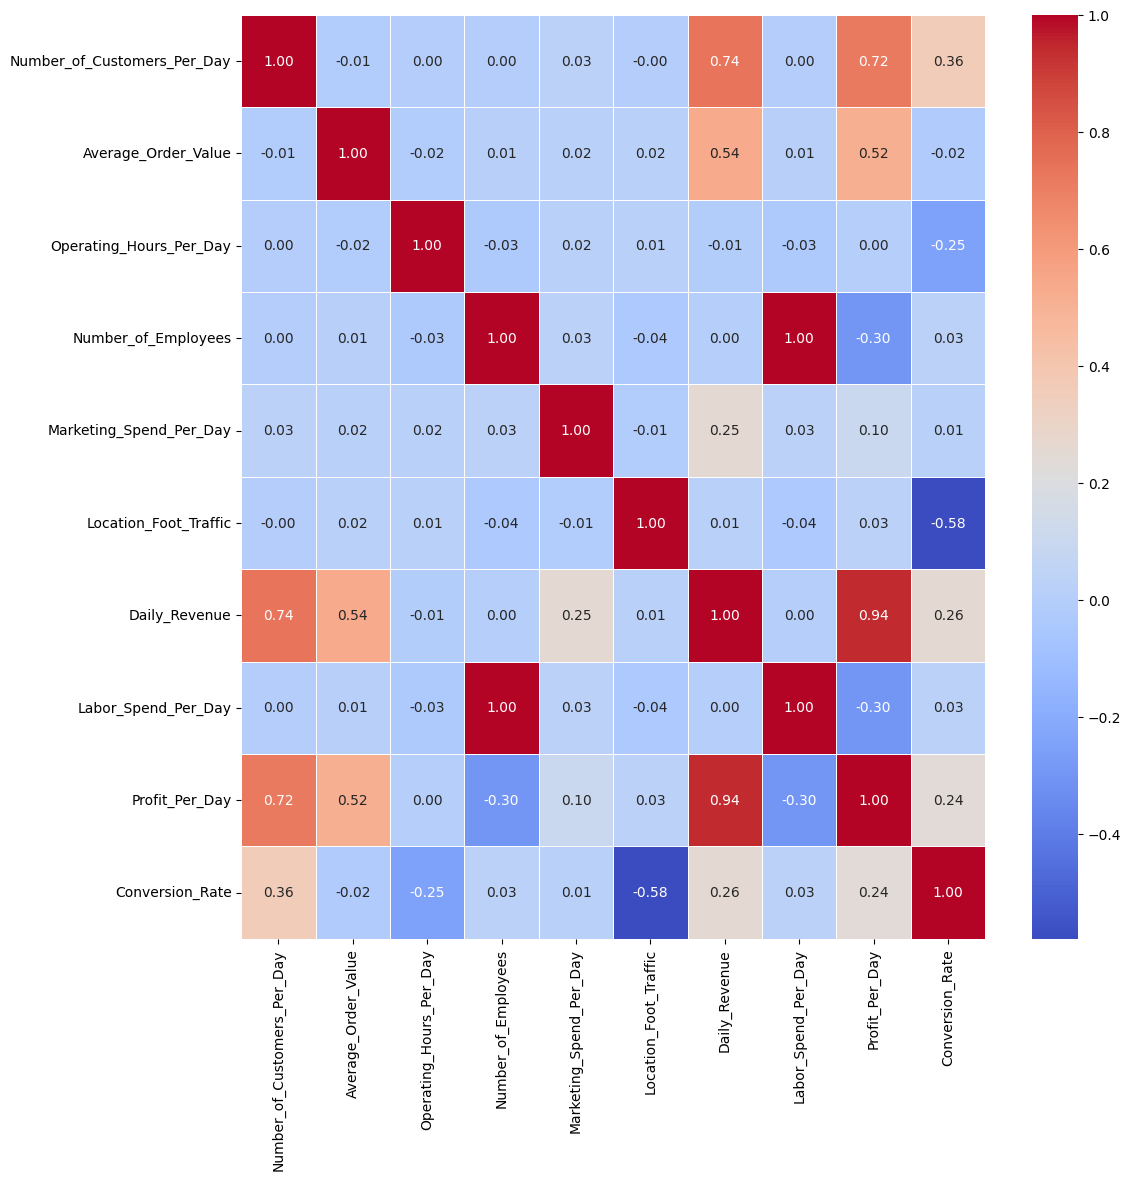

In [7]:
corr_matrix = shops.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

array([[<Axes: title={'center': 'Number_of_Customers_Per_Day'}>,
        <Axes: title={'center': 'Average_Order_Value'}>,
        <Axes: title={'center': 'Operating_Hours_Per_Day'}>],
       [<Axes: title={'center': 'Number_of_Employees'}>,
        <Axes: title={'center': 'Marketing_Spend_Per_Day'}>,
        <Axes: title={'center': 'Location_Foot_Traffic'}>],
       [<Axes: title={'center': 'Daily_Revenue'}>,
        <Axes: title={'center': 'Labor_Spend_Per_Day'}>,
        <Axes: title={'center': 'Profit_Per_Day'}>],
       [<Axes: title={'center': 'Conversion_Rate'}>, <Axes: >, <Axes: >]],
      dtype=object)

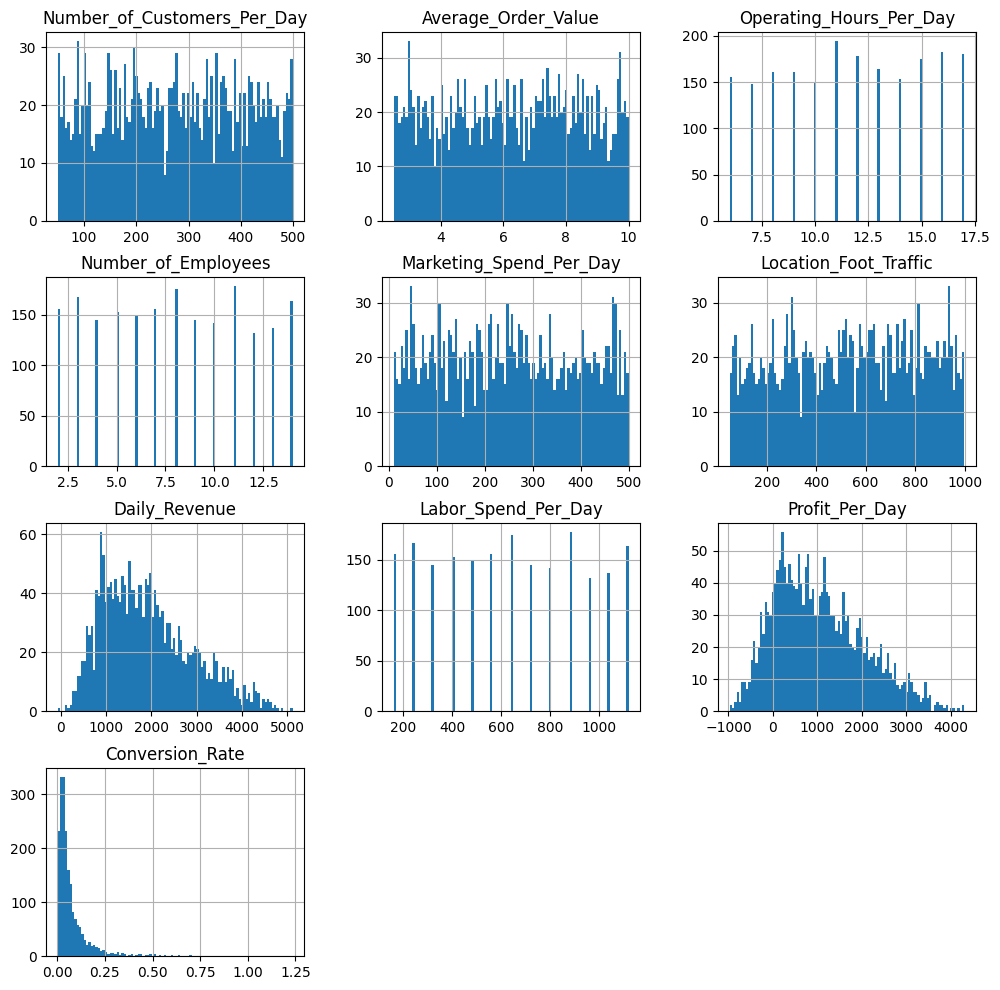

In [8]:
shops.hist(bins=100,figsize=(12,12))

In [9]:
shops.columns

Index(['Number_of_Customers_Per_Day', 'Average_Order_Value',
       'Operating_Hours_Per_Day', 'Number_of_Employees',
       'Marketing_Spend_Per_Day', 'Location_Foot_Traffic', 'Daily_Revenue',
       'Labor_Spend_Per_Day', 'Profit_Per_Day', 'Conversion_Rate'],
      dtype='object')

In [10]:
### Re-defining for ML
# Dropped low inpact features
ml_features = shops[['Number_of_Customers_Per_Day', 'Average_Order_Value','Marketing_Spend_Per_Day', 'Location_Foot_Traffic', 'Conversion_Rate']]
ml_target   = shops[['Daily_Revenue']]

X = ml_features
y = ml_target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define ML Models to test on data
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42)
}

# Store Model Results
results = {}

# Train and Evaluate Each Model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluation metrics
    r2 = r2_score(y_test, y_pred)
    results[name] = {'R² Score': r2}

    print(f"{name}; R² Score: {r2:.2f}%\n")

# Convert results to DataFrame
results_df = pd.DataFrame(results).T
print(results_df)

Linear Regression; R² Score: 0.90%

Decision Tree; R² Score: 0.89%

Random Forest; R² Score: 0.95%

Gradient Boosting; R² Score: 0.95%

XGBoost; R² Score: 0.94%

                   R² Score
Linear Regression  0.895128
Decision Tree      0.890543
Random Forest      0.948840
Gradient Boosting  0.948788
XGBoost            0.937414


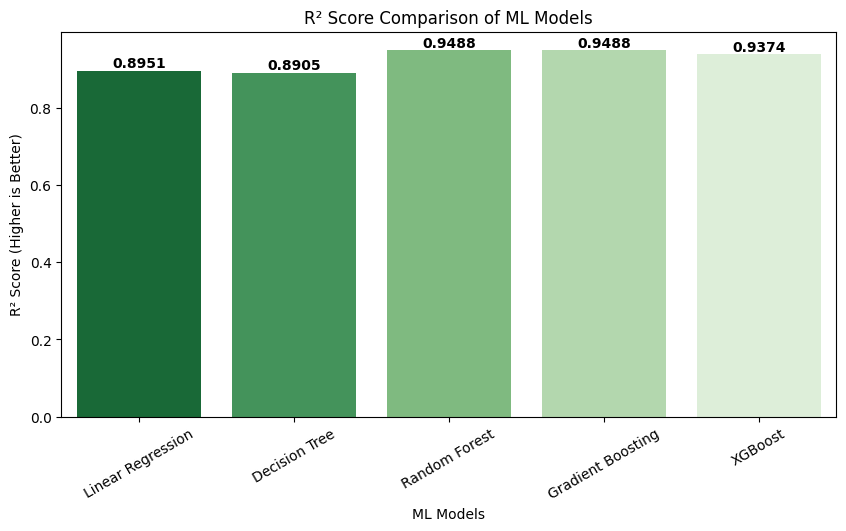

In [11]:
##### Plotting results #####
# R² Score
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=results_df.index, y=results_df["R² Score"], palette="Greens_r")
plt.xlabel("ML Models")
plt.ylabel("R² Score (Higher is Better)")
plt.title("R² Score Comparison of ML Models")
plt.xticks(rotation=30)
for p in ax.patches:
    ax.annotate(f"{p.get_height():.4f}", (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

plt.show()

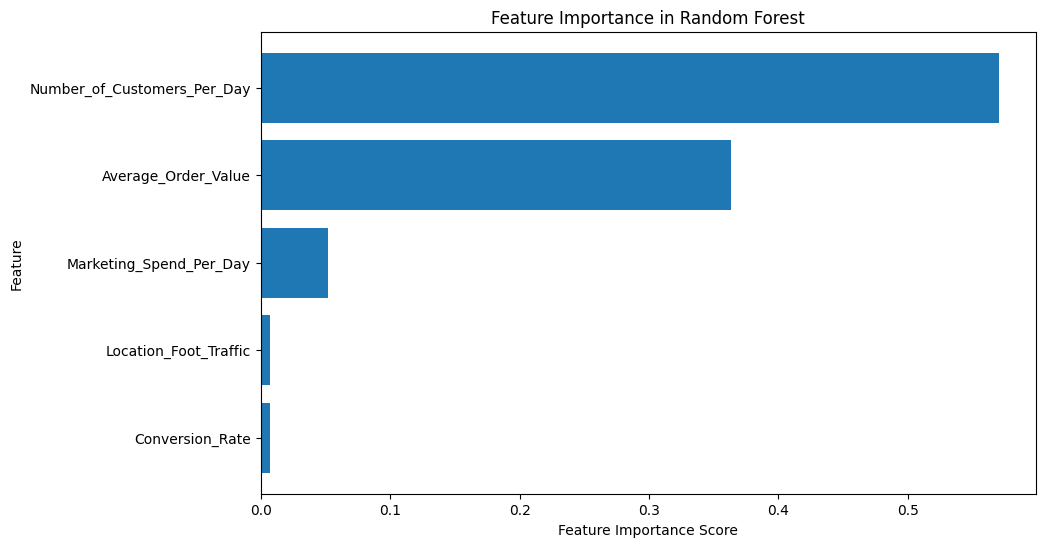

In [12]:
# Get feature importances from best trained model - Random Forest
feature_importance = models['Random Forest'].feature_importances_

# Get feature names
features = np.array(X_train.columns)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importance)
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance in Random Forest")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
##### Key Findings #####

'''

In the case of these coffee shops, the primary object of a business owner / manger with the goal of increasing revenue should focus on:

    1. Increasing the number of customers to enter the shop
        a. This could be done by displaying the store offerings in the windows
        b. Creating a sense of urgency with "limited" sales or promotions
    2. Increase AOV from customers
        a. Offer a buy one get one X% off
        b. Expand into food or merchandise
    3. Increase marketing spend (note this is low ROI)
        a. Increase marketing spend to a comfortable level given business case
        b. Review below plot to understand the point of diminishing returns

'''

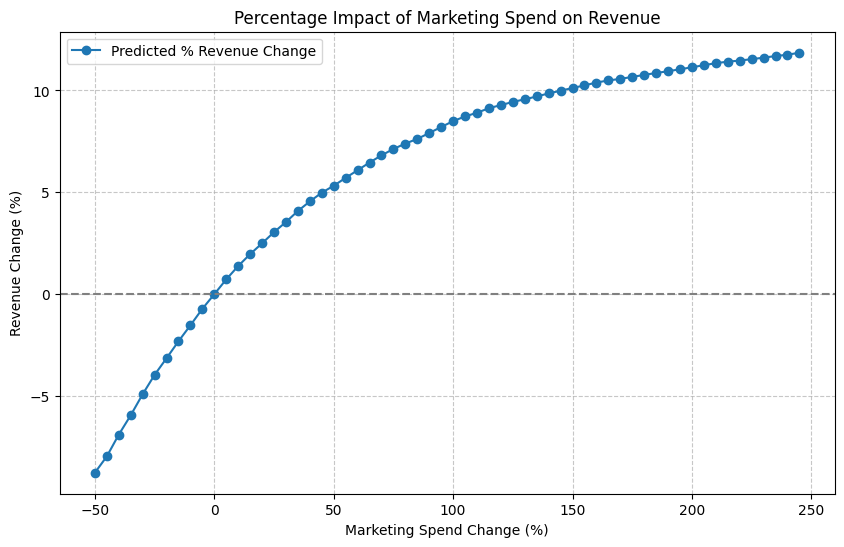

In [14]:
# Define percentage changes for marketing spend (-20% to +50%)
marketing_changes = np.arange(-0.5, 2.5, 0.05)  # From -20% to +50% in 5% steps

# Store percentage revenue changes
percent_revenue_changes = []

# Get baseline predicted revenue (without marketing changes)
baseline_revenue = models['Random Forest'].predict(X_test).mean()

# Loop through different marketing spend changes
for change in marketing_changes:
    # Create a modified test set
    scenario_X_test = X_test.copy()
    
    # Apply the percentage change to marketing spend
    scenario_X_test['Marketing_Spend_Per_Day'] *= (1 + change)
    
    # Predict new revenue
    new_predictions = models['Random Forest'].predict(scenario_X_test)
    
    # Calculate percentage change in revenue
    percent_change = ((new_predictions.mean() - baseline_revenue) / baseline_revenue) * 100
    percent_revenue_changes.append(percent_change)

# Convert to DataFrame for better visualization
relationship_df = pd.DataFrame({
    'Marketing Spend Change (%)': marketing_changes * 100, 
    'Revenue Change (%)': percent_revenue_changes
})

# Display the DataFrame
plt.figure(figsize=(10,6))

# Plot the relationship
plt.plot(relationship_df['Marketing Spend Change (%)'], relationship_df['Revenue Change (%)'], 
         marker='o', linestyle='-', label="Predicted % Revenue Change")

# Add labels and title
plt.xlabel("Marketing Spend Change (%)")
plt.ylabel("Revenue Change (%)")
plt.title("Percentage Impact of Marketing Spend on Revenue")

# Add a horizontal reference line at 0
plt.axhline(y=0, color='gray', linestyle='dashed')

# Add grid and legend
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

In [15]:
# Use the model to make daily revenue prediction (reivew below cell for reference scale)
new_data = pd.DataFrame({
    'Number_of_Customers_Per_Day': [200],
    'Average_Order_Value': [5.5],
    'Marketing_Spend_Per_Day': [400],
    'Location_Foot_Traffic': [400],
    'Conversion_Rate': [0.06]
})

predicted_revenue = models['Random Forest'].predict(new_data)
print(f"Predicted Daily Revenue: ${predicted_revenue[0]:,.2f}")

Predicted Daily Revenue: $1,509.46


In [16]:
# Review data to ensure input data is within reason
X.describe()

,Number_of_Customers_Per_Day,Average_Order_Value,Marketing_Spend_Per_Day,Location_Foot_Traffic,Conversion_Rate
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,274.296000,6.261215,252.614160,534.893500,0.079435
std,129.441933,2.175832,141.136004,271.662295,0.104987
min,50.000000,2.500000,10.120000,50.000000,0.003234
25%,164.000000,4.410000,130.125000,302.000000,0.025804
50%,275.000000,6.300000,250.995000,540.000000,0.044583
75%,386.000000,8.120000,375.352500,767.000000,0.089239
max,499.000000,10.000000,499.740000,999.000000,1.235450
